# FallGuard: A Time-Series Deep Learning Model for Intelligent Human Fall Detection

## Installing Modules
1. torch>=2.0.0 - PyTorch deep learning framework
2. torchvision>=0.15.0 - Computer vision utilities for PyTorch
3. numpy>=1.21.0 - Numerical computing library
4. pandas>=1.3.0 - Data manipulation and analysis
5. scikit-learn>=0.24.2 - Machine learning toolkit
6. matplotlib>=3.4.0 - Data visualization library
7. openpyxl>=3.0.7 - Dependency library for pandas to read xlsx files

In [ ]:
!git clone https://github.com/SyedSahil80328/fall-guard-requirement.git
!mv fall-guard-requirement/* .
!pip install -r colab_requirements.txt

Cloning into 'fall-guard-requirement'...
remote: Enumerating objects: 153644, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 153644 (delta 6), reused 10 (delta 3), pack-reused 153629 (from 3)
Receiving objects: 100% (153644/153644), 355.25 MiB | 12.73 MiB/s, done.
Resolving deltas: 100% (52/52), done.
Updating files: 100% (5116/5116), done.
INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.3/324.3 kB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.0/278.0 kB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 85.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.5/906.5 MB 855.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## Importing Necessary Modules

In [ ]:
import utils, fall_detection # Importing basic modules
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix
) # Missed import
import seaborn as sns

from utils import Utils # Module 1
from fall_detection import FallDetectionUtilities # Module 2
from tsai.basics import * # Module 3

## Instantiation and initial setup

This constructor reads the kfall dataset and assigns the device based on the availability of GPU.



In [ ]:
utils = Utils("/content") # Change the primary path accordingly


Starting Read Dataset process...
Processing Subject SA06 (1/32).
Processing Subject SA07 (2/32).
Processing Subject SA08 (3/32).
Processing Subject SA09 (4/32).
Processing Subject SA10 (5/32).
Processing Subject SA11 (6/32).
Processing Subject SA12 (7/32).
Processing Subject SA13 (8/32).
Processing Subject SA14 (9/32).
Processing Subject SA15 (10/32).
Processing Subject SA16 (11/32).
Processing Subject SA17 (12/32).
Processing Subject SA18 (13/32).
Processing Subject SA19 (14/32).
Processing Subject SA20 (15/32).
Processing Subject SA21 (16/32).
Processing Subject SA22 (17/32).
Processing Subject SA23 (18/32).
Processing Subject SA24 (19/32).
Processing Subject SA25 (20/32).
Processing Subject SA26 (21/32).
Processing Subject SA27 (22/32).
Processing Subject SA28 (23/32).
Processing Subject SA29 (24/32).
Processing Subject SA30 (25/32).
Processing Subject SA31 (26/32).
Processing Subject SA32 (27/32).
Processing Subject SA33 (28/32).
Processing Subject SA35 (29/32).
Processing Subject

In [ ]:
print("Dataset fetched.")
print(f"Total samples: {sum([len(performed_tasks) for _, performed_tasks in utils.dataset.items()])}")
utils.dataset["SA06"]["S06T01R01"]["data"].head(20)

Dataset fetched.
Total samples: 5075


,TimeStamp(s),FrameCounter,AccX,AccY,AccZ,GyrX,GyrY,GyrZ,EulerX,EulerY,EulerZ
0,0.01,1,-0.053,-1.004,0.000,-0.057296,0.401071,0.343775,87.788625,-2.859060,-20.202499
1,0.02,2,-0.054,-1.007,0.000,-0.057296,0.229183,0.229183,87.788625,-2.864790,-20.196769
2,0.03,3,-0.056,-1.009,-0.004,-0.458366,0.286479,0.171887,87.782895,-2.864790,-20.196769
3,0.04,4,-0.053,-1.011,-0.009,-0.916733,0.458366,0.229183,87.771436,-2.870520,-20.191040
4,0.05,5,-0.052,-1.012,-0.011,-1.088620,0.343775,0.401071,87.817273,-2.841872,-20.191040
5,0.06,6,-0.053,-1.008,-0.012,-1.088620,0.114592,0.401071,87.805813,-2.841872,-20.191040
6,0.07,7,-0.053,-1.006,-0.014,-1.145916,0.171887,0.171887,87.794354,-2.847601,-20.191040
7,0.08,8,-0.052,-1.005,-0.013,-1.317803,0.458366,0.057296,87.782895,-2.847601,-20.185310
8,0.09,9,-0.053,-1.001,-0.011,-1.145916,0.343775,0.171887,87.771436,-2.847601,-20.179581
9,0.10,10,-0.055,-1.000,-0.011,-0.916733,-0.057296,0.171887,87.834461,-2.881979,-20.191040


## Dataset Pre-precessing

### Vector Summation and Feature Selection

It reduces the 3D co-ordinates of `Acc`, `Gyr`, and `Euler` into single magnitude and reduces the pandas dataframe to have only `FrameCounter`, `Acc`, `Gyr`, and `Euler` magnitudes.

In [ ]:
utils.vector_summation()


Starting vector summation process...
Processing Subject SA06 (1/32).
Processing Subject SA07 (2/32).
Processing Subject SA08 (3/32).
Processing Subject SA09 (4/32).
Processing Subject SA10 (5/32).
Processing Subject SA11 (6/32).
Processing Subject SA12 (7/32).
Processing Subject SA13 (8/32).
Processing Subject SA14 (9/32).
Processing Subject SA15 (10/32).
Processing Subject SA16 (11/32).
Processing Subject SA17 (12/32).
Processing Subject SA18 (13/32).
Processing Subject SA19 (14/32).
Processing Subject SA20 (15/32).
Processing Subject SA21 (16/32).
Processing Subject SA22 (17/32).
Processing Subject SA23 (18/32).
Processing Subject SA24 (19/32).
Processing Subject SA25 (20/32).
Processing Subject SA26 (21/32).
Processing Subject SA27 (22/32).
Processing Subject SA28 (23/32).
Processing Subject SA29 (24/32).
Processing Subject SA30 (25/32).
Processing Subject SA31 (26/32).
Processing Subject SA32 (27/32).
Processing Subject SA33 (28/32).
Processing Subject SA35 (29/32).
Processing Sub

In [ ]:
print("Dataset after Vector Summation:")
utils.dataset["SA06"]["S06T01R01"]["data"].head(20)

Dataset after Vector Summation:


,FrameCounter,Acc,Gyr,Euler
0,1,1.005398,0.531339,90.128563
1,2,1.008447,0.329139,90.127461
2,3,1.010561,0.567199,90.121880
3,4,1.012428,1.050249,90.109616
4,5,1.013395,1.210014,90.153357
5,6,1.009464,1.165797,90.142194
6,7,1.007492,1.171415,90.131213
7,8,1.006428,1.396420,90.118768
8,9,1.002462,1.208656,90.106322
9,10,1.001572,0.934466,90.171373


### Some Util Tasks

1. Getting Trial Lengths.
2. Getting no of trials of a task performed by a subject.
3. Plotting data of subjects as per tasks.

In [ ]:
utils.get_no_of_trials()
utils.get_trial_lengths()
utils.plot_subject_readings() #Attention: Consumes more RAM!

File to get no of trials is saved successfully.
It is found in "/content/fall-guard/dataset-insights/subject_trials.csv"
File to get trial lengths is saved successfully.
It is found in "/content/fall-guard/dataset-insights/subject_trials_frame_counts.csv"

Starting Data plot process...
Processing Subject SA06 (1/32).
Processing Subject SA07 (2/32).
Processing Subject SA08 (3/32).
Processing Subject SA09 (4/32).
Processing Subject SA10 (5/32).
Processing Subject SA11 (6/32).
Processing Subject SA12 (7/32).
Processing Subject SA13 (8/32).
Processing Subject SA14 (9/32).
Processing Subject SA15 (10/32).
Processing Subject SA16 (11/32).
Processing Subject SA17 (12/32).
Processing Subject SA18 (13/32).
Processing Subject SA19 (14/32).
Processing Subject SA20 (15/32).
Processing Subject SA21 (16/32).
Processing Subject SA22 (17/32).
Processing Subject SA23 (18/32).
Processing Subject SA24 (19/32).
Processing Subject SA25 (20/32).
Processing Subject SA26 (21/32).
Processing Subject SA27 (22/3

### Label Demonstration for Fall Data

Tasks 20 - 35 are categorized as fall. So, there are labels only for these tasks. Here the `fall_onset_frame` and `fall_impact_frame` of Subject `SA06` for various activities are listed.

In [ ]:
sample_label = pd.read_excel(f"{utils.primary_path}/kfall-dataset/label_data_new/SA06_label.xlsx")
sample_label["Task Code (Task ID)"] = sample_label["Task Code (Task ID)"].ffill()
sample_label["Description"] = sample_label["Description"].ffill()
sample_label.head(20)

,Task Code (Task ID),Description,Trial ID,Fall_onset_frame,Fall_impact_frame
0,F01 (20),Forward fall when trying to sit down,1,130,208
1,F01 (20),Forward fall when trying to sit down,2,184,272
2,F01 (20),Forward fall when trying to sit down,3,184,260
3,F01 (20),Forward fall when trying to sit down,4,151,231
4,F01 (20),Forward fall when trying to sit down,5,128,223
5,F02 (21),Backward fall when trying to sit down,1,122,161
6,F02 (21),Backward fall when trying to sit down,2,128,167
7,F02 (21),Backward fall when trying to sit down,3,147,187
8,F02 (21),Backward fall when trying to sit down,4,130,167
9,F03 (22),lateral fall when trying to sit down,1,128,194


In [ ]:
utils.dataset["SA06"]["S06T20R01"]["data"].head(20)

,FrameCounter,Acc,Gyr,Euler
0,1,0.867367,38.468444,71.519576
1,2,1.026920,2.586574,71.498731
2,3,1.022935,3.888524,71.479329
3,4,1.022349,5.745600,71.447824
4,5,1.027701,7.055763,71.540612
5,6,1.027402,7.800019,71.497520
6,7,1.011022,8.301962,71.455675
7,8,0.996724,7.658586,71.419615
8,9,0.998516,7.564348,71.378060
9,10,1.003548,7.988810,71.486343


In [ ]:
print(f"[Fall Onset Frame, Fall Impact Frame]: {utils.dataset['SA06']['S06T20R02']['label']}")

[Fall Onset Frame, Fall Impact Frame]: [np.int64(184), np.int64(272)]


### Segment Formation

It divides the bigger time-series data into smaller segments (here `sequence_threshold` = 50) to maintain equal size among the dataset.

In [ ]:
utils.segments_formation()


Starting segments formation process...
Processing Subject SA06 (1/32).
Processing Subject SA07 (2/32).
Processing Subject SA08 (3/32).
Processing Subject SA09 (4/32).
Processing Subject SA10 (5/32).
Processing Subject SA11 (6/32).
Processing Subject SA12 (7/32).
Processing Subject SA13 (8/32).
Processing Subject SA14 (9/32).
Processing Subject SA15 (10/32).
Processing Subject SA16 (11/32).
Processing Subject SA17 (12/32).
Processing Subject SA18 (13/32).
Processing Subject SA19 (14/32).
Processing Subject SA20 (15/32).
Processing Subject SA21 (16/32).
Processing Subject SA22 (17/32).
Processing Subject SA23 (18/32).
Processing Subject SA24 (19/32).
Processing Subject SA25 (20/32).
Processing Subject SA26 (21/32).
Processing Subject SA27 (22/32).
Processing Subject SA28 (23/32).
Processing Subject SA29 (24/32).
Processing Subject SA30 (25/32).
Processing Subject SA31 (26/32).
Processing Subject SA32 (27/32).
Processing Subject SA33 (28/32).
Processing Subject SA35 (29/32).
Processing S

In [ ]:
print(f"Segmented Labels for Example ADL: {utils.dataset['SA06']['S06T02R01']['label']}.\nSegmented Data sizes: {[len(g) for g in utils.dataset['SA06']['S06T02R01']['data']]}.")
print(f"\nSegmented Labels for Example Fall: {utils.dataset['SA06']['S06T20R01']['label']}.\nSegmented Data sizes: {[len(g) for g in utils.dataset['SA06']['S06T20R01']['data']]}.")

Segmented Labels for Example ADL: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0].
Segmented Data sizes: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50].

Segmented Labels for Example Fall: [0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0].
Segmented Data sizes: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50].


In [ ]:
utils.dataset['SA06']['S06T01R01']['data'][0] # First Segment of Dataset

,FrameCounter,Acc,Gyr,Euler
0,1,1.005398,0.531339,90.128563
1,2,1.008447,0.329139,90.127461
2,3,1.010561,0.567199,90.121880
3,4,1.012428,1.050249,90.109616
4,5,1.013395,1.210014,90.153357
5,6,1.009464,1.165797,90.142194
6,7,1.007492,1.171415,90.131213
7,8,1.006428,1.396420,90.118768
8,9,1.002462,1.208656,90.106322
9,10,1.001572,0.934466,90.171373


## Handling Class Imbalance

### Dataset Re-arrangement

It is performed to have dataset in the format of `[[segments], [labels]]`

In [ ]:
fall_utils = FallDetectionUtilities(utils.dataset)
fall_utils.reshape_dataset()

adl_segments = [data for data, label in zip(fall_utils.shaped_data[0], fall_utils.shaped_data[1]) if label == 0]
real_fall_segments = [data for data, label in zip(fall_utils.shaped_data[0], fall_utils.shaped_data[1]) if label == 1]


Starting dataset reshaping...
Processing Subject SA06.
Processing Subject SA07.
Processing Subject SA08.
Processing Subject SA09.
Processing Subject SA10.
Processing Subject SA11.
Processing Subject SA12.
Processing Subject SA13.
Processing Subject SA14.
Processing Subject SA15.
Processing Subject SA16.
Processing Subject SA17.
Processing Subject SA18.
Processing Subject SA19.
Processing Subject SA20.
Processing Subject SA21.
Processing Subject SA22.
Processing Subject SA23.
Processing Subject SA24.
Processing Subject SA25.
Processing Subject SA26.
Processing Subject SA27.
Processing Subject SA28.
Processing Subject SA29.
Processing Subject SA30.
Processing Subject SA31.
Processing Subject SA32.
Processing Subject SA33.
Processing Subject SA35.
Processing Subject SA36.
Processing Subject SA37.
Processing Subject SA38.

Dataset reshaping completed!
Total Segments: 79965, ADL Segments (Class label 0): 74226, Fall Segments (Class label 1): 5739.


### Generation of Best Fake Data

SMOTE is leveraged to generate remaining fall segments and they are evaluated against an LSTM Discriminator to prove their realiness. It is performed under some random seeds to pick the best result.

In [ ]:
seed_list = random.sample(range(1, 100), 20)
chosen_model, chosen_seed, promising_fp_score, fake_fall_segments = None, None, -1, None

for seed in seed_list:
    print(f"Current seed: {seed}.")
    temp_fake_fall_segments = fall_utils.apply_smote(seed=seed)
    trained_model, fp_score = fall_utils.train_lstm_discriminator_on_falls(
        real_samples=real_fall_segments,
        fake_samples=random.sample(temp_fake_fall_segments, len(real_fall_segments)),
        seed=seed
    )
    if fp_score > promising_fp_score:
        promising_fp_score = fp_score
        chosen_model = trained_model
        chosen_seed = seed
        fake_fall_segments = temp_fake_fall_segments

    print(f"Current fooling rate: {fp_score * 100:.2f}, Best fooling rate: {promising_fp_score * 100:.2f}.\n")

Current seed: 48.
TP: 593, TN: 1356, FP: 383, FN: 1112, Acc: 56.57%, Prec: 60.42%
Current fooling rate: 22.02, Best fooling rate: 22.02.

Current seed: 88.
TP: 439, TN: 1471, FP: 235, FN: 1299, Acc: 57.74%, Prec: 62.74%
Current fooling rate: 13.77, Best fooling rate: 22.02.

Current seed: 21.
TP: 571, TN: 1430, FP: 318, FN: 1125, Acc: 57.92%, Prec: 62.14%
Current fooling rate: 18.19, Best fooling rate: 22.02.

Current seed: 15.
TP: 623, TN: 1375, FP: 338, FN: 1108, Acc: 58.87%, Prec: 66.00%
Current fooling rate: 19.73, Best fooling rate: 22.02.

Current seed: 58.
TP: 448, TN: 1422, FP: 278, FN: 1296, Acc: 53.88%, Prec: 58.59%
Current fooling rate: 16.35, Best fooling rate: 22.02.

Current seed: 57.
TP: 510, TN: 1445, FP: 268, FN: 1221, Acc: 56.16%, Prec: 59.56%
Current fooling rate: 15.65, Best fooling rate: 22.02.

Current seed: 29.
TP: 513, TN: 1481, FP: 203, FN: 1247, Acc: 58.41%, Prec: 63.54%
Current fooling rate: 12.05, Best fooling rate: 22.02.

Current seed: 75.
TP: 420, TN: 149

### Preparing Data

In [ ]:
fall_segments = real_fall_segments + fake_fall_segments

### Plots: Real vs Fake

In [ ]:
real_fall_sample_segments = random.sample(real_fall_segments, 5)
fake_fall_sample_segments = random.sample(fake_fall_segments, 5)

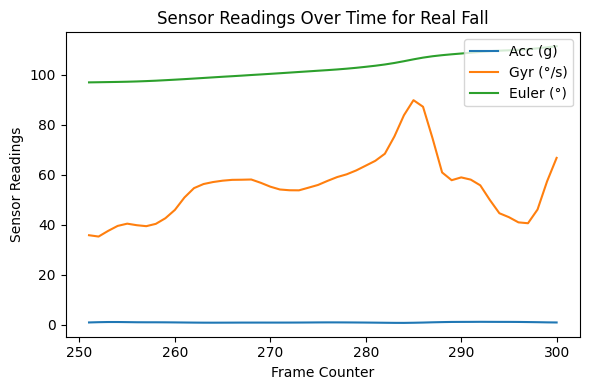

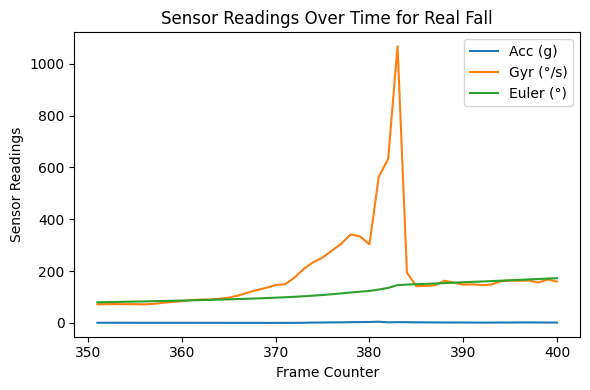

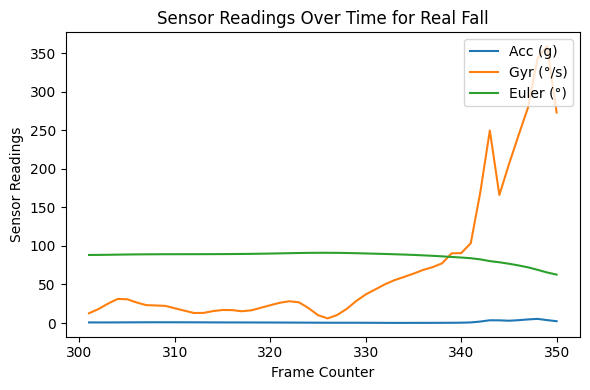

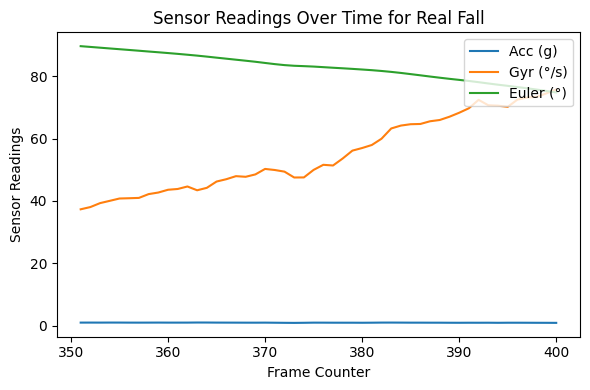

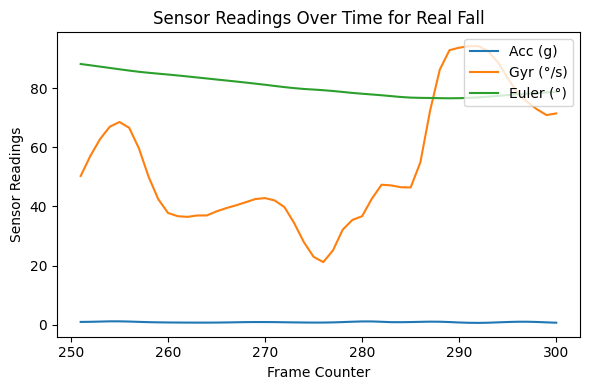

In [ ]:
for i in range(len(real_fall_sample_segments)):
    plt.figure(figsize=(6, 4))
    plt.plot(real_fall_sample_segments[i]['FrameCounter'], real_fall_sample_segments[i]['Acc'], label="Acc (g)")
    plt.plot(real_fall_sample_segments[i]['FrameCounter'], real_fall_sample_segments[i]['Gyr'], label="Gyr (°/s)")
    plt.plot(real_fall_sample_segments[i]['FrameCounter'], real_fall_sample_segments[i]['Euler'], label="Euler (°)")
    plt.xlabel("Frame Counter")
    plt.ylabel("Sensor Readings")
    plt.title(f"Sensor Readings Over Time for Real Fall")
    plt.legend(loc="upper right")
    plt.tight_layout()
    plt.show()

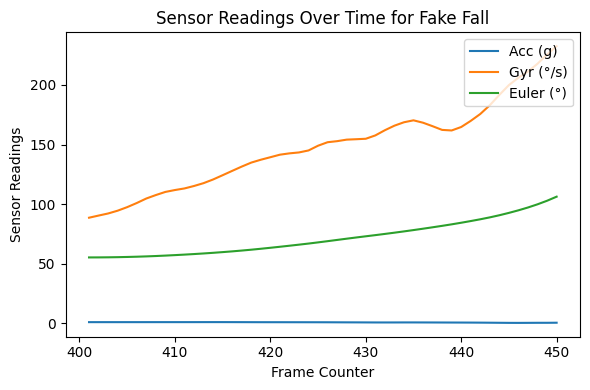

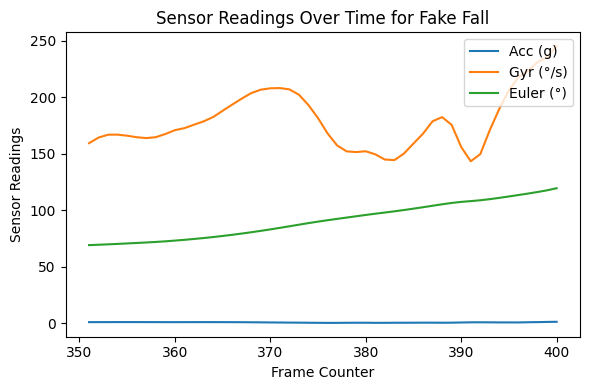

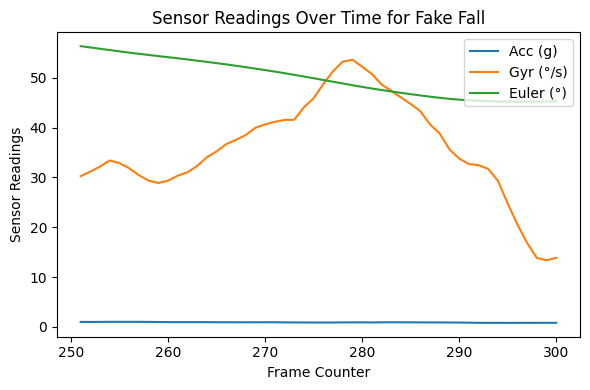

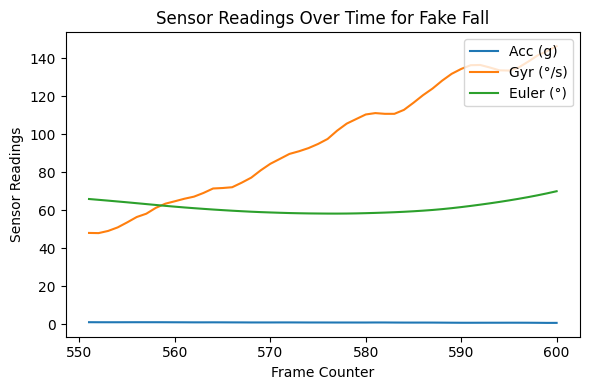

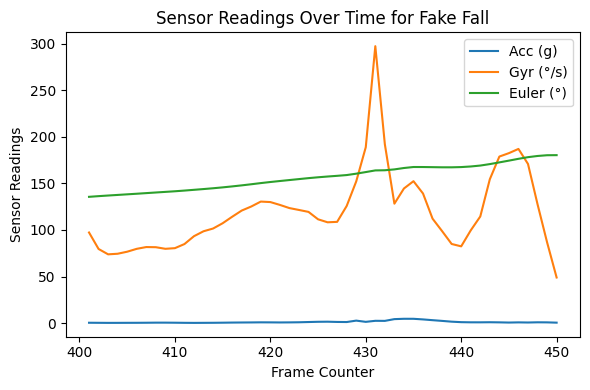

In [ ]:
for i in range(len(fake_fall_sample_segments)):
    plt.figure(figsize=(6, 4))
    plt.plot(fake_fall_sample_segments[i]['FrameCounter'], fake_fall_sample_segments[i]['Acc'], label="Acc (g)")
    plt.plot(fake_fall_sample_segments[i]['FrameCounter'], fake_fall_sample_segments[i]['Gyr'], label="Gyr (°/s)")
    plt.plot(fake_fall_sample_segments[i]['FrameCounter'], fake_fall_sample_segments[i]['Euler'], label="Euler (°)")
    plt.xlabel("Frame Counter")
    plt.ylabel("Sensor Readings")
    plt.title(f"Sensor Readings Over Time for Fake Fall")
    plt.legend(loc="upper right")
    plt.tight_layout()
    plt.show()

## Classification of Falls

### Dataset Re-arrangement

In [ ]:
all_segments = adl_segments + fall_segments
print(len(adl_segments), len(fall_segments), len(all_segments))
X_raw = np.stack([seg.to_numpy() for seg in all_segments])  # (num_samples, 50, 4)
X = np.transpose(X_raw, (0, 2, 1))  # tsai format: (num_samples, 4, 50)
y = np.array([0] * len(adl_segments) + [1] * len(fall_segments), dtype=np.int64)

74226 74226 148452


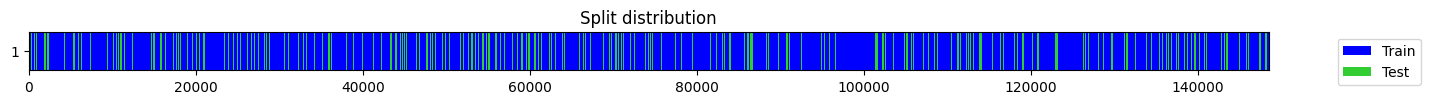

In [ ]:
architectures_list = ["LSTM", "TCN", "InceptionTimePlus", "XceptionTime", "TST"] # Oldest to Recent
splits = get_splits(y, valid_size=0.2, stratify=True, random_state=42)

tfms = [None, TSClassification()]
batch_tfms = TSStandardize()

### LSTM

#### Model Training

epoch,train_loss,valid_loss,accuracy,time
0,0.348850,0.333914,0.861199,00:11
1,0.293681,0.300368,0.873964,00:11
2,0.250373,0.269646,0.884069,00:11
3,0.239309,0.251073,0.889929,00:11
4,0.210845,0.214868,0.908757,00:11
5,0.205449,0.220412,0.905355,00:11
6,0.203303,0.201713,0.915628,00:11
7,0.193298,0.188542,0.921354,00:11
8,0.197305,0.179986,0.925901,00:11
9,0.171502,0.176729,0.927282,00:11


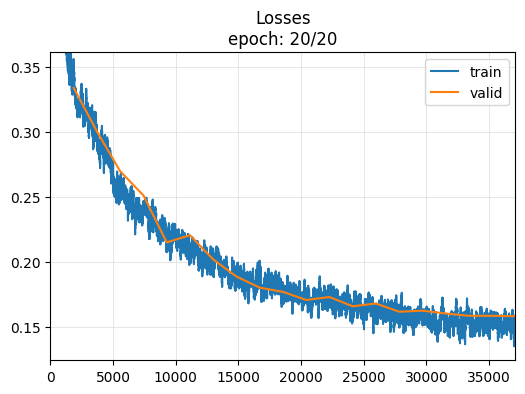

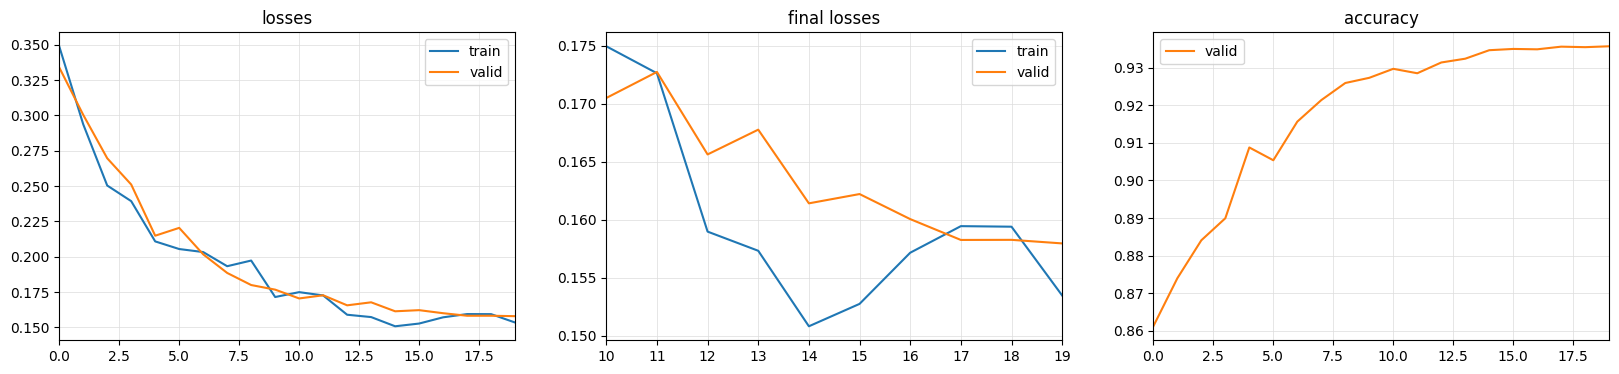

In [ ]:
arch = "LSTM"
clf = TSClassifier(X, y, splits=splits, arch=arch, tfms=tfms, batch_tfms=batch_tfms,metrics=accuracy, cbs=ShowGraph())
clf.fit_one_cycle(20, 3e-4)
clf.export(f"fall-guard/models/fall_detector_{arch}.pkl")

#### Validation

Accuracy: 0.9356685752778713

Classification Report:
              precision    recall  f1-score   support

         ADL       0.95      0.93      0.93     14845
        Fall       0.93      0.95      0.94     14845

    accuracy                           0.94     29690
   macro avg       0.94      0.94      0.94     29690
weighted avg       0.94      0.94      0.94     29690



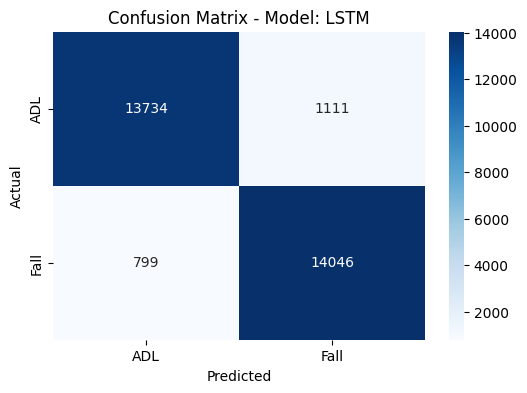

In [ ]:
probas, target, preds = clf.get_X_preds(X[splits[1]], y[splits[1]])
target = target.cpu().numpy() if hasattr(target, 'cpu') else np.array(target)
preds = preds.astype(int)

print("Accuracy:", accuracy_score(target, preds))
print("\nClassification Report:")
print(classification_report(target, preds, target_names=["ADL", "Fall"]))

cm = confusion_matrix(target, preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["ADL", "Fall"], yticklabels=["ADL", "Fall"])
plt.title("Confusion Matrix - Model: LSTM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### TCN

#### Model Training

epoch,train_loss,valid_loss,accuracy,time
0,0.359157,0.357133,0.846986,00:41
1,0.314343,0.326538,0.856551,00:40
2,0.262265,0.261621,0.885281,00:40
3,0.230745,0.226349,0.904614,00:41
4,0.210283,0.203458,0.916639,00:40
5,0.189952,0.189360,0.923846,00:41
6,0.184436,0.180292,0.924789,00:40
7,0.176553,0.168716,0.931728,00:41
8,0.157466,0.165854,0.933378,00:41
9,0.163593,0.160686,0.935669,00:42


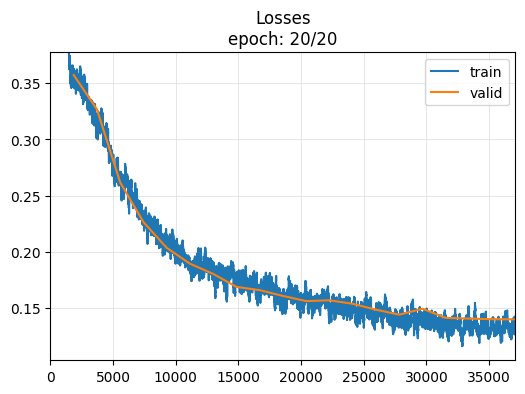

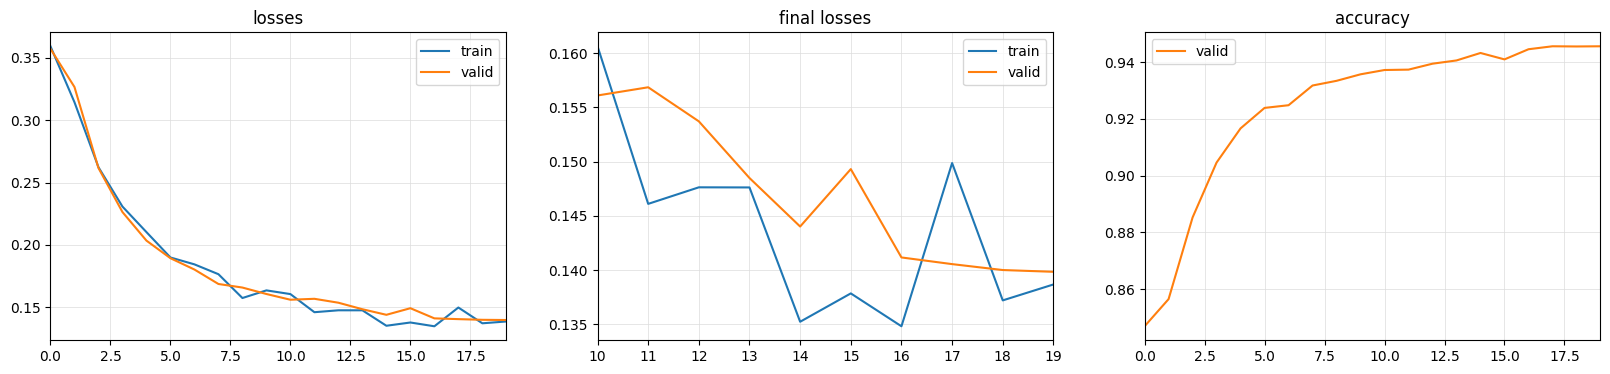

In [ ]:
# Train and export model
arch = "TCN"
clf = TSClassifier(X, y, splits=splits, arch=arch, tfms=tfms, batch_tfms=batch_tfms, metrics=accuracy, cbs=ShowGraph())
clf.fit_one_cycle(20, 3e-4)
clf.export(f"fall-guard/models/fall_detector_{arch}.pkl")

#### Validation

Accuracy: 0.9455372179184911

Classification Report:
              precision    recall  f1-score   support

         ADL       0.95      0.94      0.95     14845
        Fall       0.94      0.95      0.95     14845

    accuracy                           0.95     29690
   macro avg       0.95      0.95      0.95     29690
weighted avg       0.95      0.95      0.95     29690



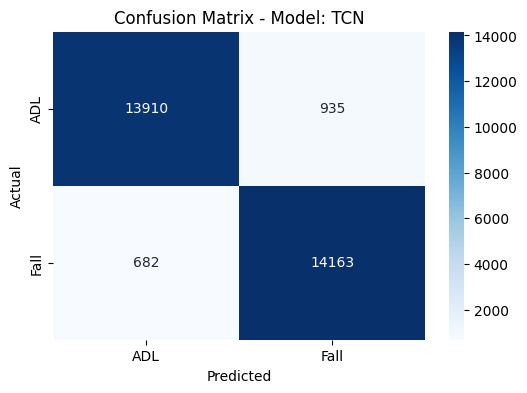

In [ ]:
# Evaluate model
probas, target, preds = clf.get_X_preds(X[splits[1]], y[splits[1]])
target = target.cpu().numpy() if hasattr(target, 'cpu') else np.array(target)
preds = preds.astype(int)

print("Accuracy:", accuracy_score(target, preds))
print("\nClassification Report:")
print(classification_report(target, preds, target_names=["ADL", "Fall"]))

cm = confusion_matrix(target, preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["ADL", "Fall"], yticklabels=["ADL", "Fall"])
plt.title("Confusion Matrix - Model: TCN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### InceptionTimePlus

#### Model Training

epoch,train_loss,valid_loss,accuracy,time
0,0.214019,0.199064,0.918020,00:46
1,0.190342,0.180543,0.925093,00:46
2,0.186472,0.165409,0.932300,00:46
3,0.176774,0.166435,0.933075,00:46
4,0.103337,0.132096,0.947289,00:47
5,0.080010,0.143011,0.942843,00:46
6,0.091140,0.098815,0.962580,00:47
7,0.066250,0.068553,0.974840,00:47
8,0.070135,0.093601,0.964534,00:47
9,0.063555,0.061364,0.977703,00:46


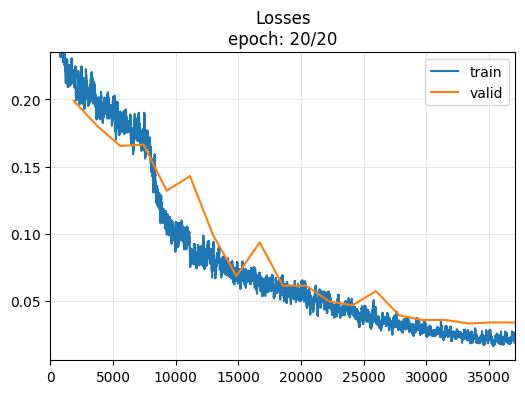

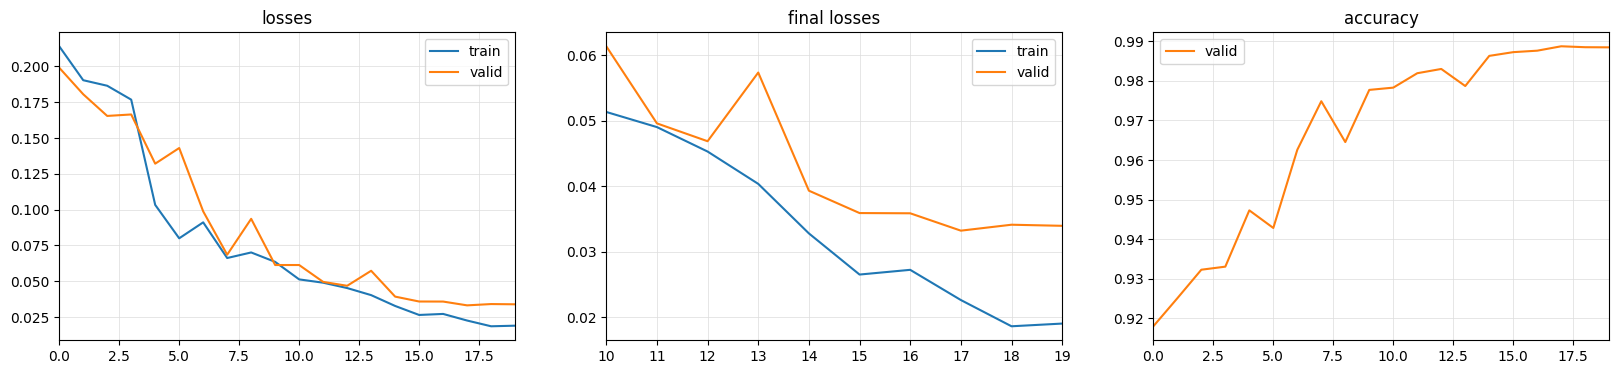

In [ ]:
arch = "InceptionTimePlus"
clf = TSClassifier(X, y, splits=splits, arch=arch, tfms=tfms, batch_tfms=batch_tfms, metrics=accuracy, cbs=ShowGraph())
clf.fit_one_cycle(20, 3e-4)
clf.export(f"fall-guard/models/fall_detector_{arch}.pkl")

#### Validation

Accuracy: 0.9884472886493769

Classification Report:
              precision    recall  f1-score   support

         ADL       0.99      0.98      0.99     14845
        Fall       0.98      0.99      0.99     14845

    accuracy                           0.99     29690
   macro avg       0.99      0.99      0.99     29690
weighted avg       0.99      0.99      0.99     29690



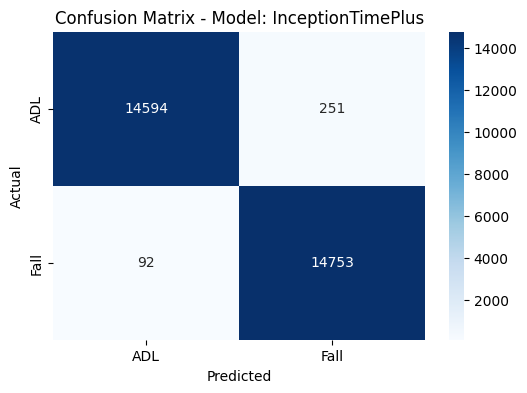

In [ ]:
probas, target, preds = clf.get_X_preds(X[splits[1]], y[splits[1]])
target = target.cpu().numpy() if hasattr(target, 'cpu') else np.array(target)
preds = preds.astype(int)

print("Accuracy:", accuracy_score(target, preds))
print("\nClassification Report:")
print(classification_report(target, preds, target_names=["ADL", "Fall"]))

cm = confusion_matrix(target, preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["ADL", "Fall"], yticklabels=["ADL", "Fall"])
plt.title("Confusion Matrix - Model: InceptionTimePlus")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### XceptionTime

#### Model Training

epoch,train_loss,valid_loss,accuracy,time
0,0.395947,0.397792,0.883968,00:36
1,0.342568,0.331806,0.901415,00:35
2,0.253423,0.292426,0.901179,00:35
3,0.176937,0.317944,0.855170,00:35
4,0.128666,0.620528,0.761738,00:36
5,0.095728,0.492946,0.795857,00:35
6,0.084737,0.104565,0.963254,00:35
7,0.083260,0.104447,0.961974,00:35
8,0.073940,0.070721,0.974705,00:35
9,0.068785,0.065154,0.977905,00:35


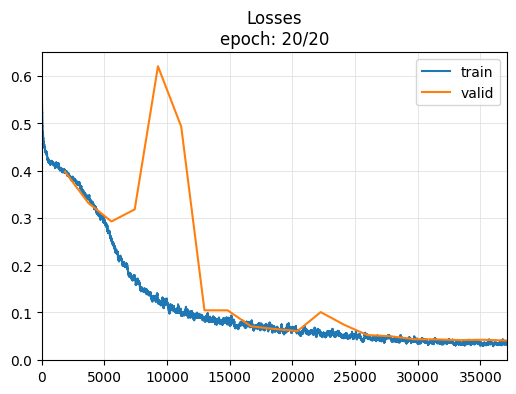

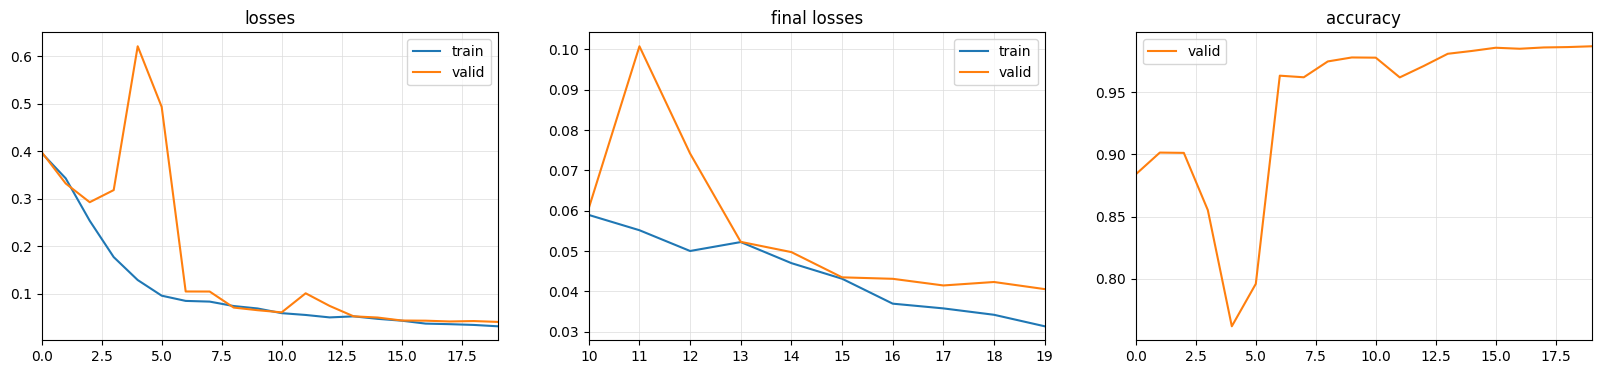

In [ ]:
arch = "XceptionTime"
clf = TSClassifier(X, y, splits=splits, arch=arch, tfms=tfms, batch_tfms=batch_tfms, metrics=accuracy, cbs=ShowGraph())
clf.fit_one_cycle(20, 3e-4)
clf.export(f"fall-guard/models/fall_detector_{arch}.pkl")

#### Validation

Accuracy: 0.9868979454361738

Classification Report:
              precision    recall  f1-score   support

         ADL       0.99      0.98      0.99     14845
        Fall       0.98      0.99      0.99     14845

    accuracy                           0.99     29690
   macro avg       0.99      0.99      0.99     29690
weighted avg       0.99      0.99      0.99     29690



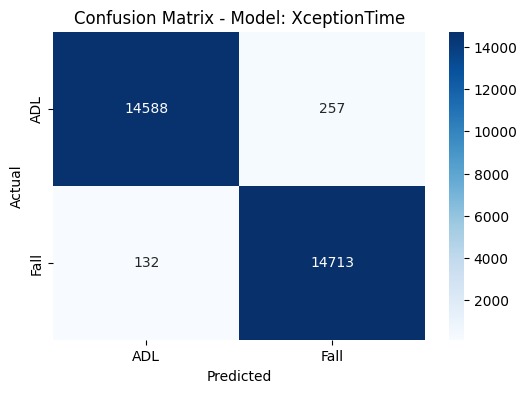

In [ ]:
probas, target, preds = clf.get_X_preds(X[splits[1]], y[splits[1]])
target = target.cpu().numpy() if hasattr(target, 'cpu') else np.array(target)
preds = preds.astype(int)

print("Accuracy:", accuracy_score(target, preds))
print("\nClassification Report:")
print(classification_report(target, preds, target_names=["ADL", "Fall"]))

cm = confusion_matrix(target, preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["ADL", "Fall"], yticklabels=["ADL", "Fall"])
plt.title("Confusion Matrix - Model: XceptionTime")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### TST

#### Model Training

epoch,train_loss,valid_loss,accuracy,time
0,0.254420,0.240319,0.895386,00:37
1,0.220349,0.204671,0.915729,00:37
2,0.209887,0.224267,0.904951,00:37
3,0.199353,0.208682,0.910542,00:37
4,0.179949,0.189603,0.921792,00:37
5,0.168536,0.175882,0.928595,00:37
6,0.156640,0.172993,0.931762,00:38
7,0.170805,0.159997,0.934961,00:38
8,0.166719,0.168239,0.933917,00:38
9,0.149131,0.160133,0.934119,00:38


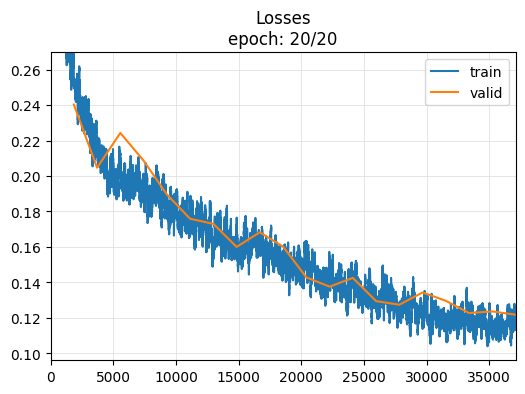

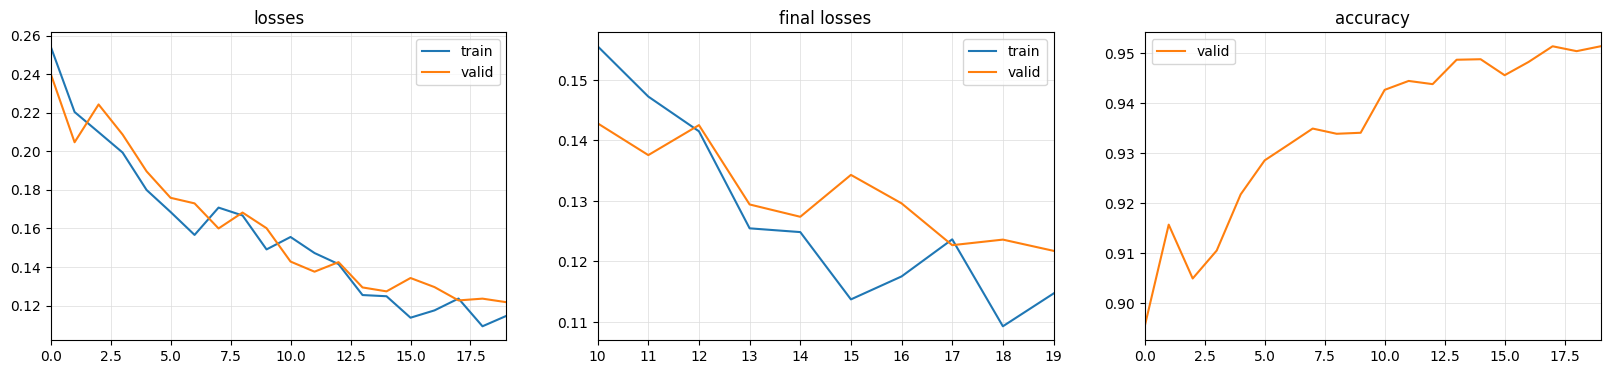

In [ ]:
arch = "TST"
clf = TSClassifier(X, y, splits=splits, arch=arch, tfms=tfms, batch_tfms=batch_tfms, metrics=accuracy, cbs=ShowGraph())
clf.fit_one_cycle(20, 3e-4)
clf.export(f"fall-guard/models/fall_detector_{arch}.pkl")

#### Validation

Accuracy: 0.9514314584035028

Classification Report:
              precision    recall  f1-score   support

         ADL       0.98      0.93      0.95     14845
        Fall       0.93      0.98      0.95     14845

    accuracy                           0.95     29690
   macro avg       0.95      0.95      0.95     29690
weighted avg       0.95      0.95      0.95     29690



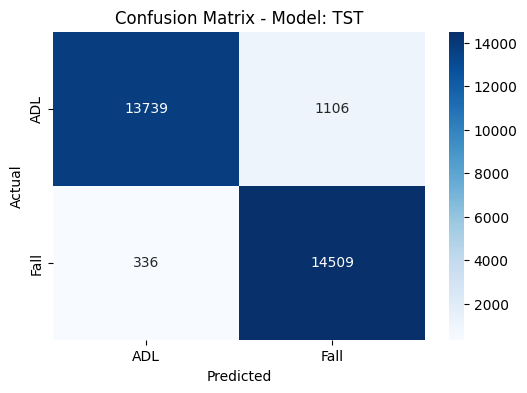

In [ ]:
probas, target, preds = clf.get_X_preds(X[splits[1]], y[splits[1]])
target = target.cpu().numpy() if hasattr(target, 'cpu') else np.array(target)
preds = preds.astype(int)

print("Accuracy:", accuracy_score(target, preds))
print("\nClassification Report:")
print(classification_report(target, preds, target_names=["ADL", "Fall"]))

cm = confusion_matrix(target, preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["ADL", "Fall"], yticklabels=["ADL", "Fall"])
plt.title("Confusion Matrix - Model: TST")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### Summary

In [ ]:
from tsai.inference import load_learner
accuracies = []
precisions = []
recalls = []
f1_scores = []
tps = []
tns = []
fps = []
fns = []

for arch in architectures_list:
    clf = load_learner(f"fall-guard/models/fall_detector_{arch}.pkl")

    probas, target, preds = clf.get_X_preds(X[splits[1]], y[splits[1]])
    target = target.cpu().numpy() if hasattr(target, 'cpu') else np.array(target)
    preds = preds.astype(int)

    # Compute basic metrics
    acc = accuracy_score(target, preds)
    prec = precision_score(target, preds)
    rec = recall_score(target, preds)
    f1 = f1_score(target, preds)

    # Store rounded values
    accuracies.append(f"{acc * 100:.2f}%")
    precisions.append(f"{prec * 100:.2f}%")
    recalls.append(f"{rec * 100:.2f}%")
    f1_scores.append(f"{f1 * 100:.2f}%")

    # Confusion matrix
    cm = confusion_matrix(target, preds)
    tn, fp, fn, tp = cm.ravel()
    tps.append(tp)
    tns.append(tn)
    fps.append(fp)
    fns.append(fn)

df = pd.DataFrame({
    "Architecture": architectures_list,
    "Accuracy": accuracies,
    "Precision": precisions,
    "Recall": recalls,
    "F1-Score": f1_scores,
    "TP": tps,
    "TN": tns,
    "FP": fps,
    "FN": fns
})

# Display nicely in notebook or CLI
print(df.to_markdown(index=False))

| Architecture      | Accuracy   | Precision   | Recall   | F1-Score   |    TP |    TN |   FP |   FN |
|:------------------|:-----------|:------------|:---------|:-----------|------:|------:|-----:|-----:|
| LSTM              | 93.57%     | 92.67%      | 94.62%   | 93.63%     | 14046 | 13734 | 1111 |  799 |
| TCN               | 94.55%     | 93.81%      | 95.41%   | 94.60%     | 14163 | 13910 |  935 |  682 |
| InceptionTimePlus | 98.84%     | 98.33%      | 99.38%   | 98.85%     | 14753 | 14594 |  251 |   92 |
| XceptionTime      | 98.69%     | 98.28%      | 99.11%   | 98.70%     | 14713 | 14588 |  257 |  132 |
| TST               | 95.14%     | 92.92%      | 97.74%   | 95.27%     | 14509 | 13739 | 1106 |  336 |


## Saving fall-guard

In [ ]:
for i in range(len(adl_segments)):
    adl_segments[i].to_csv(f'fall-guard/dataset/adl/{i+1}.csv', index=False)
    if (i + 1) % 5000 == 0:
        print(f"{i+1} ADL segments saved.")
print(f"Saved {len(adl_segments)}.\n")

for i in range(len(fall_segments)):
    fall_segments[i].to_csv(f'fall-guard/dataset/fall/{i+1}.csv', index=False)
    if (i + 1) % 5000 == 0:
        print(f"{i+1} Fall segments saved.")
print(f"Saved {len(fall_segments)}.\n")

!zip -rq fall-guard.zip fall-guard

from google.colab import files
files.download(f'fall-guard.zip')

5000 ADL segments saved.
10000 ADL segments saved.
15000 ADL segments saved.
20000 ADL segments saved.
25000 ADL segments saved.
30000 ADL segments saved.
35000 ADL segments saved.
40000 ADL segments saved.
45000 ADL segments saved.
50000 ADL segments saved.
55000 ADL segments saved.
60000 ADL segments saved.
65000 ADL segments saved.
70000 ADL segments saved.
Saved 74226.

5000 Fall segments saved.
10000 Fall segments saved.
15000 Fall segments saved.
20000 Fall segments saved.
25000 Fall segments saved.
30000 Fall segments saved.
35000 Fall segments saved.
40000 Fall segments saved.
45000 Fall segments saved.
50000 Fall segments saved.
55000 Fall segments saved.
60000 Fall segments saved.
65000 Fall segments saved.
70000 Fall segments saved.
Saved 74226.



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>